In [6]:
using Pkg
pkg_folder = "../"
Pkg.activate(pkg_folder)

import Markdown; Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
include(pkg_folder*"src/initialize.jl")

@show Threads.nthreads() # check number of threads

  Activating 

Threads.nthreads() = 1

project at `~/Documents/GitHub/Bnc_julia`


1

In [7]:
q_sym = [:qA, :qB, :qC]
K_sym = [:Kab, :Kac, :Kbc]
x_sym = [:A, :B, :C, :AB, :AC, :BC]

N = [1 1 0 -1 0 0;
     1 0 1 0 -1 0;
     0 1 1 0 0 -1;]

model = Bnc(N=N, x_sym=x_sym, q_sym=q_sym, K_sym=K_sym)

find_all_vertices!(model)
summary(model)
show_conservation(model)

---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 25 vertices found and 25 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
----------Binding Network Summary:-------------
Number of species (n): 6
Number of conserved quantities (d): 3
Number of reactions (r): 3
L matrix: [1 0 0 1 1 0; 0 1 0 1 0 1; 0 0 1 0 1 1]
N matrix: [1 1 0 -1 0 0; 1 0 1 0 -1 0; 0 1 1 0 0 -1]
Direction of binding reactions: backward
Catalysis involved: No
Regimes constructed: Yes
Number of regimes: 25
  - Invertible + Asymptotic: 16
  - Singular +  Asymptotic: 9
  - Invertible +  Non-Asymptotic: 0
  - Singular +  Non-Asymptotic: 0
-----------------------------------------------


3-element Vector{Equation}:
 qA ~ A + AB + AC
 qB ~ AB + B + BC
 qC ~ AC + BC + C

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



┌ Info: Number of polyhedra to calc volume: 16
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:17
┌ Info: All regimes converged after 15800000 samples.
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:55
┌ Info: Total samples: 15800000, Elapsed: 25.5 s
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:121


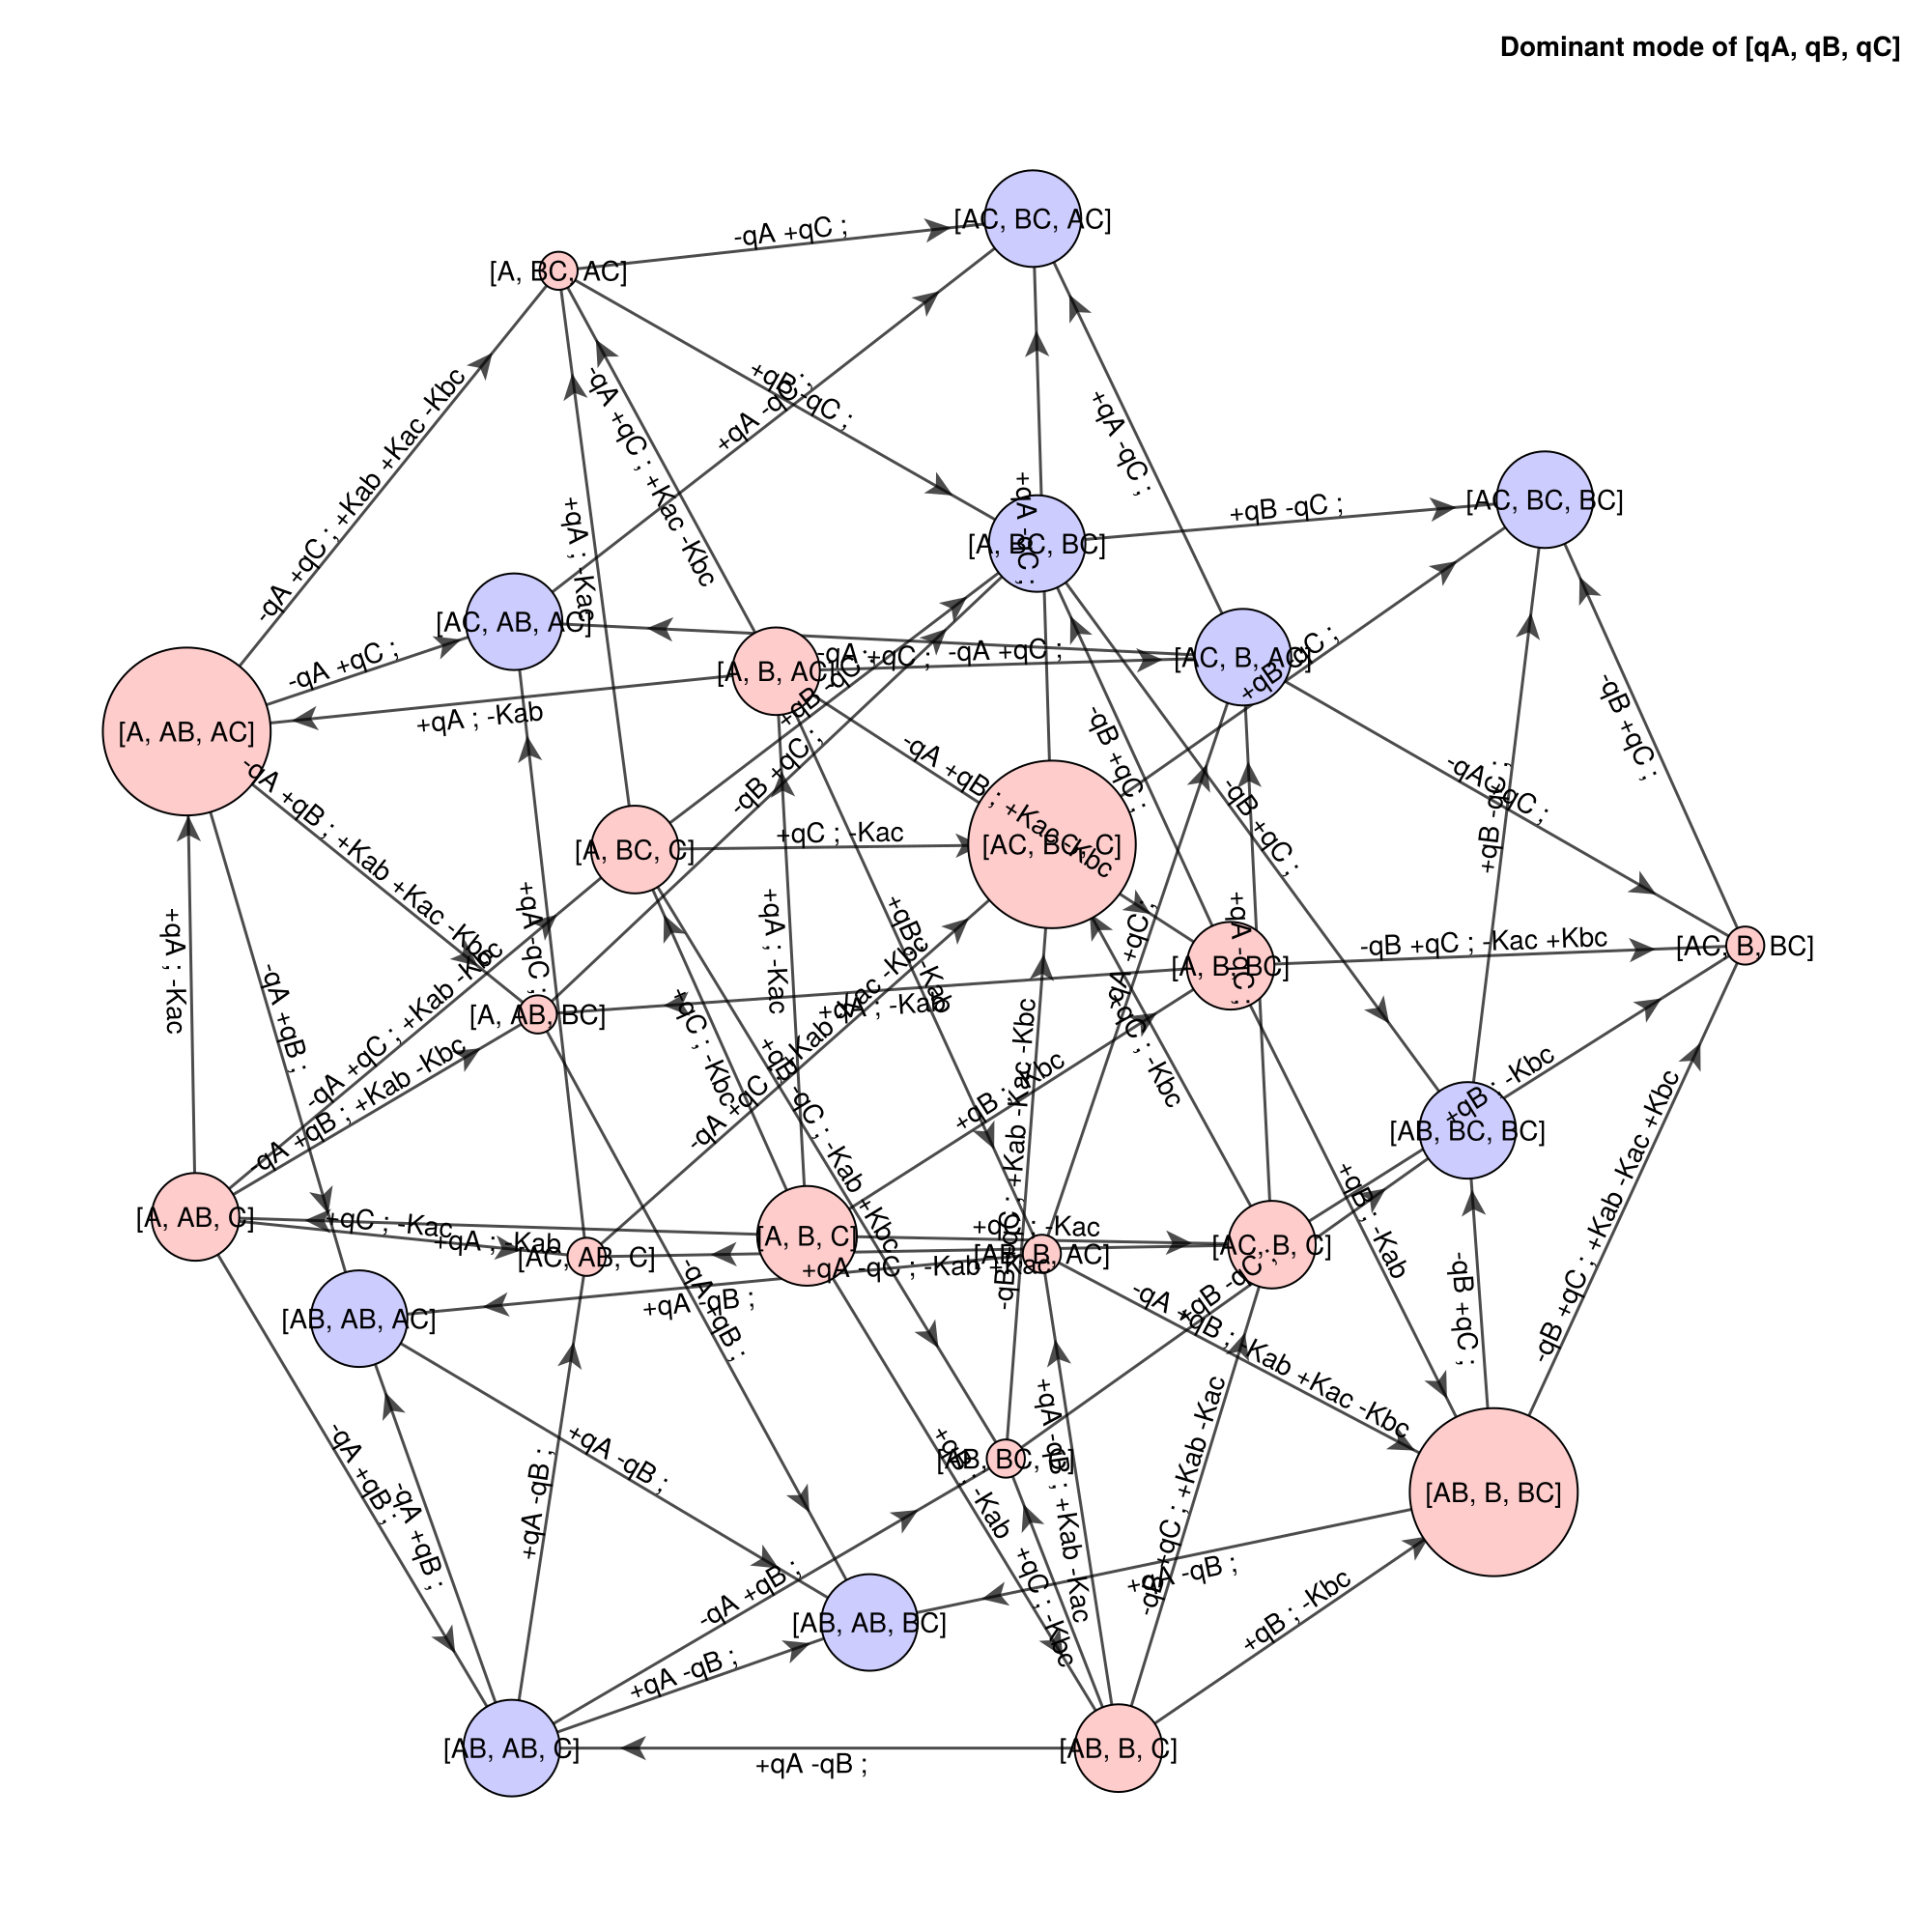

CairoMakie.Screen{IMAGE}


In [8]:
f,ax,p = draw_vertices_neighbor_graph(model)
# add_vertices_idx!(ax, p)
display(f)

In [9]:
grh = SISO_graph(model, :qA)
summary_path(grh, :BC) |> render_path

┌ Info: sources: [16, 20, 12, 1, 23, 3, 7, 10, 18]
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/regime_graphs.jl:232
┌ Info: sinks: [5]
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/regime_graphs.jl:233
┌ Info: Number of polyhedra to calc volume: 24
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:17


Path [1, 2, 3, 6]     0 → -1 → -2                   	  Volume: 0.2    ± 0.001 
Path [21, 47, 59, 83]  0 → -Inf → -1 → -2            	  Volume: 0.1167 ± 0.0006


┌ Info: All regimes converged after 24600000 samples.
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:55
┌ Info: Total samples: 24600000, Elapsed: 38.55 s
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:121


Path [46, 108]        0 → NaN → 0 → -2              	  Volume: 0.096  ± 0.0005
Path [9, 33, 71, 95]  0 → -1 → -Inf → -2            	  Volume: 0.0836 ± 0.0004
Path [5, 8]           0 → 0 → -2                    	  Volume: 0.0708 ± 0.0004
Path [24, 50, 60, 84]  0 → -Inf → -1 → -Inf → -2     	  Volume: 0.0333 ± 0.0002
Path [45, 107]        0 → NaN → 0 → -1 → -2         	  Volume: 0.0208 ± 0.0001
Path [4, 7]           0 → 0 → -1 → -2               	  Volume: 0.0125 ± 0.0001
Path [18, 42, 78, 102]  0 → -1 → -Inf → -Inf → -1 → -Inf → NaN → 0 → -2	  Volume: 0.0    ± 0.0   
Path [16, 40, 76, 100]  0 → -1 → -Inf → -Inf → -1 → -Inf → -Inf → NaN → 0 → -2	  Volume: 0.0    ± 0.0   
Path [28, 54, 66, 90]  0 → -Inf → -1 → -Inf → -Inf → -1 → -Inf → NaN → 0 → -2	  Volume: 0.0    ± 0.0   
Path [11, 35, 79, 103]  0 → -1 → -Inf → -Inf → NaN → 0 → -1 → -2	  Volume: 0.0    ± 0.0   
Path [12, 36, 80, 104]  0 → -1 → -Inf → -Inf → NaN → 0 → -2	  Volume: 0.0    ± 0.0   
Path [29, 55, 62, 86]  0 → -Inf → -1 → -I

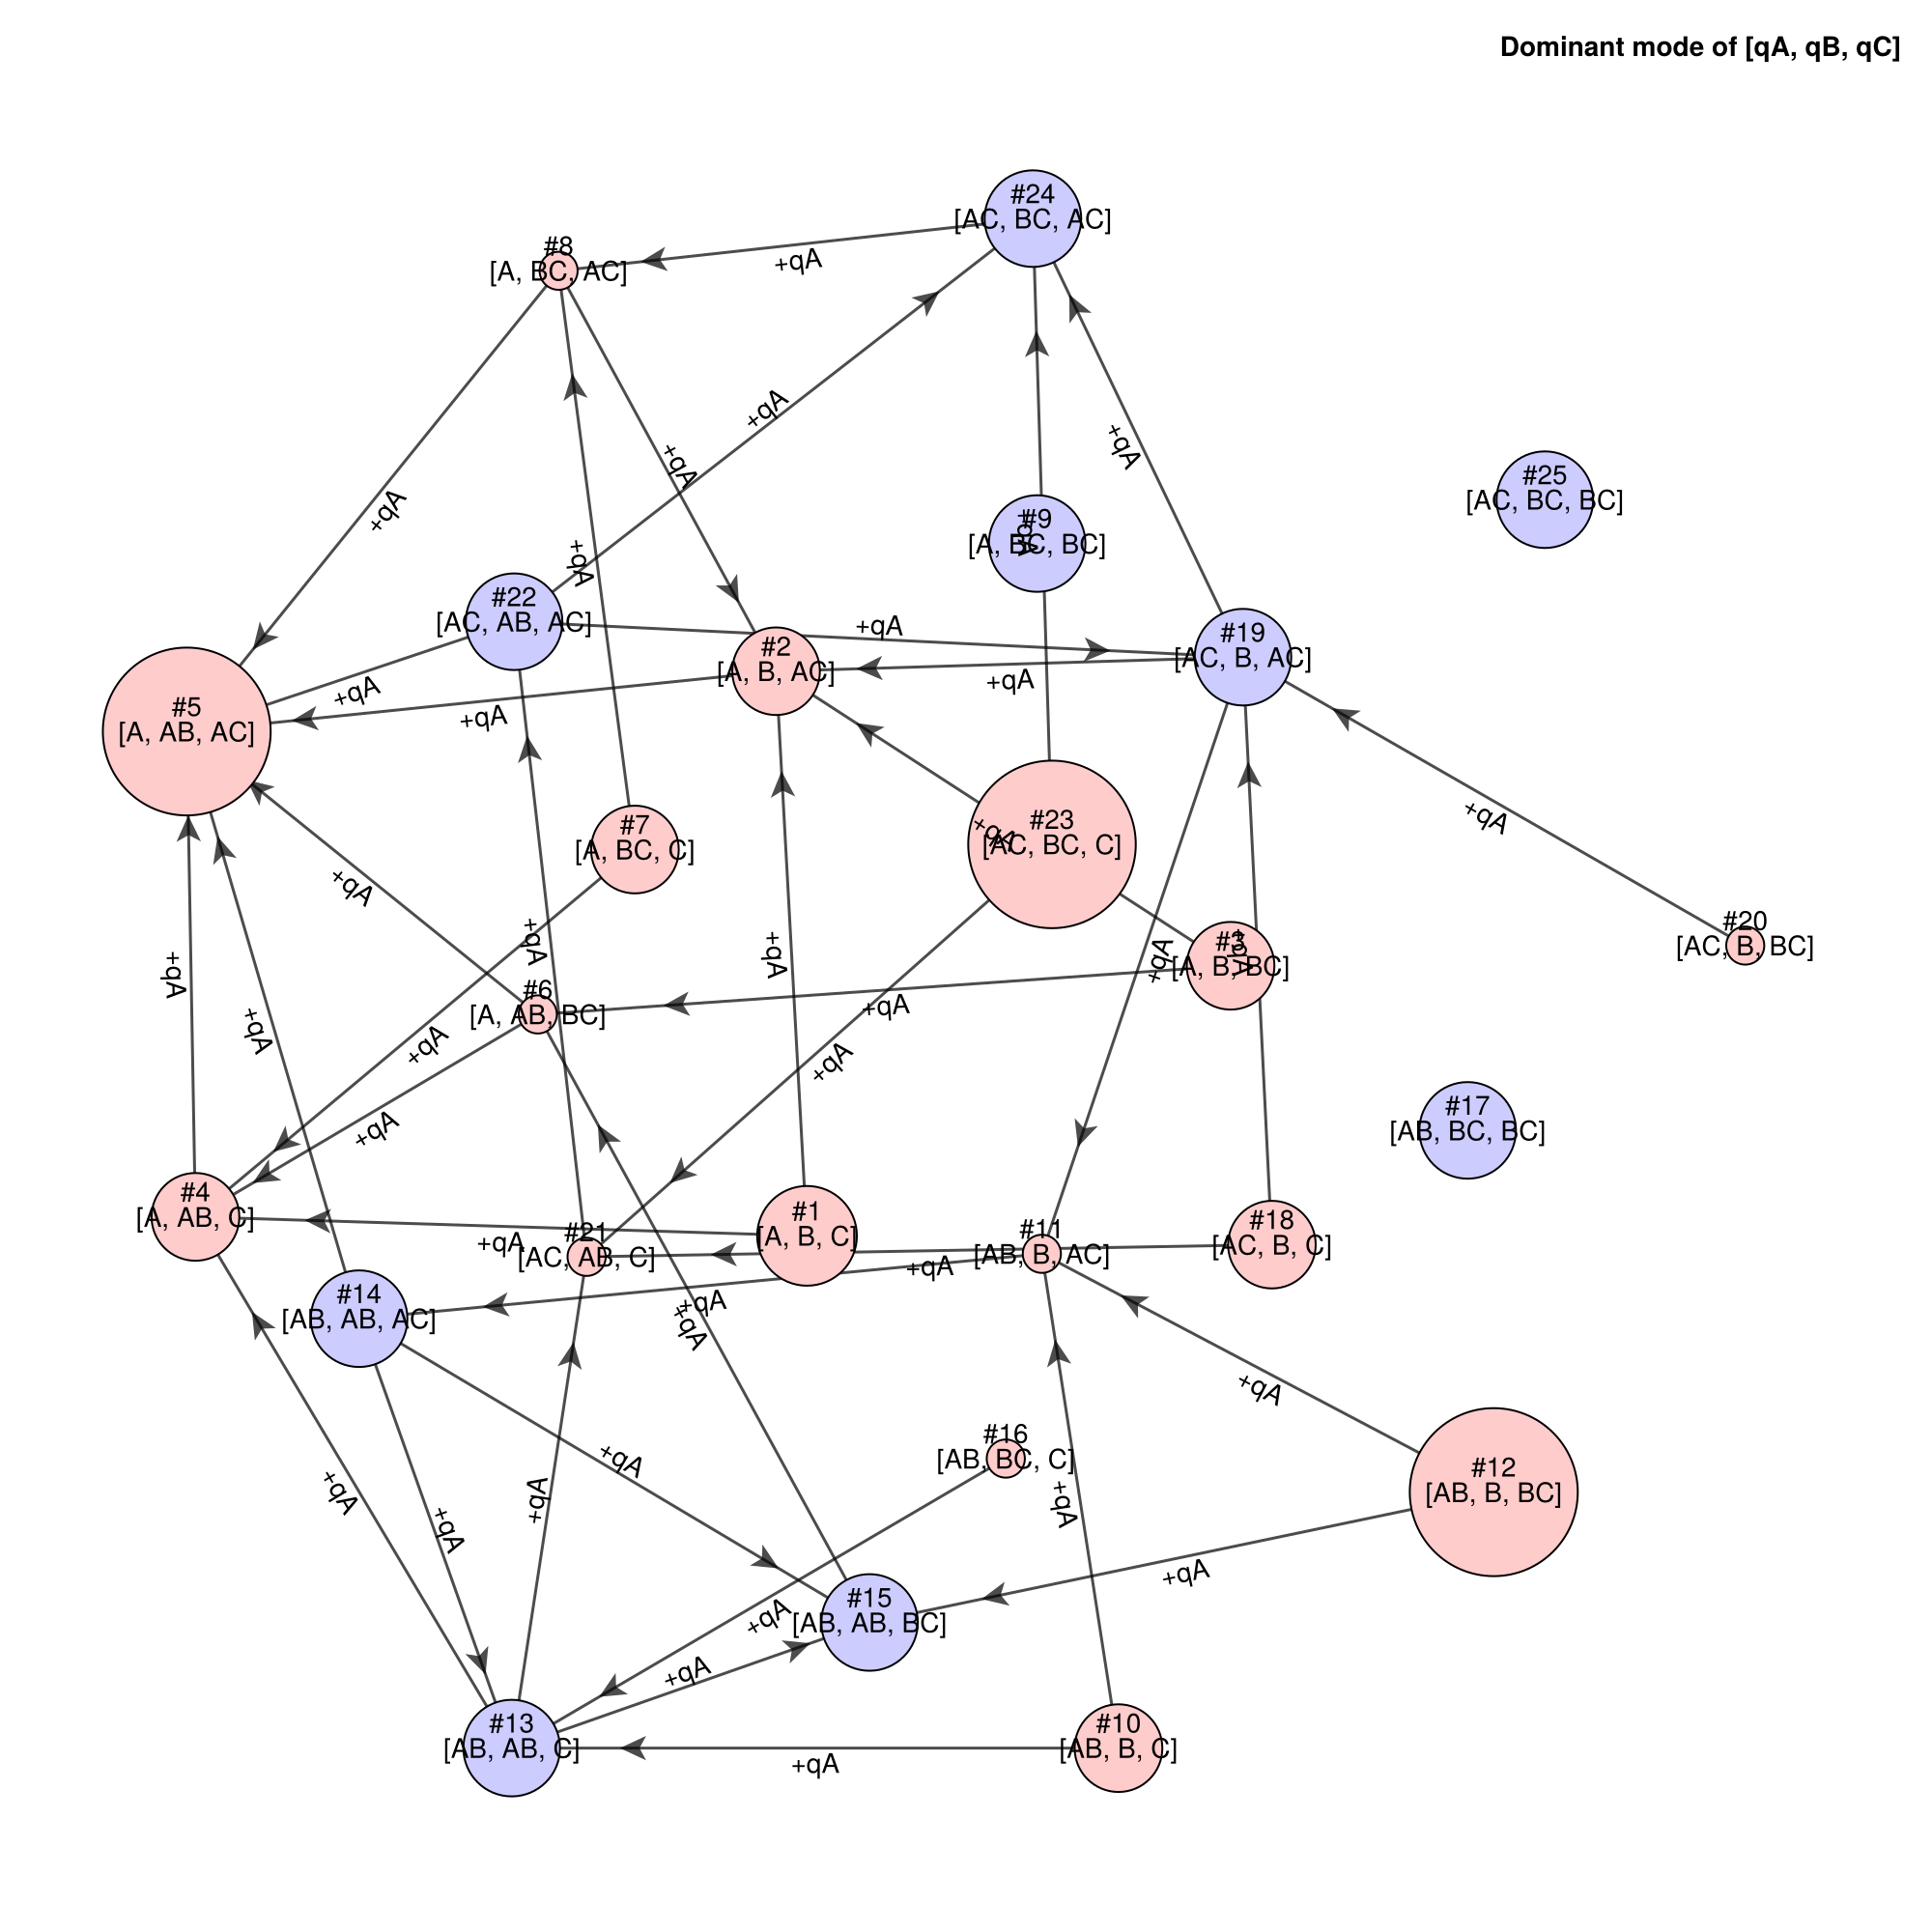

CairoMakie.Screen{IMAGE}


In [10]:
f, ax, p = draw_vertices_neighbor_graph(grh)
add_vertices_idx!(ax, p)
display(f)